### <div align="center">Федеральное государственное бюджетное образовательное учреждение высшего образования</div>   
### **<div align="center"> «ФИНАНСОВЫЙ УНИВЕРСИТЕТ ПРИ ПРАВИТЕЛЬСТВЕ РОССИЙСКОЙ ФЕДЕРАЦИИ»</div>**
#### **<div align="center">Департамент анализа данных и машинного обучения</div>**
<br>

<div align="center">Пояснительная записка к курсовой работе
по дисциплине «Технологии анализа данных и машинное обучение»
на тему:</div>      
<br>
<div align="center">«Предварительный анализ
данных и построение
признаков в задачах
предсказания оттока
клиентов»</div>
<br>
<br>

<span style="float:right">
<div align='justify'>Выполнил: <br><br></div>
<div align='justify', style="max-width:250px";>студент группы ПМ22-4 факультета
информационных технологий и анализа больших данных</div>
Колдинов К.A.   <br>
<br>
Научный руководитель:<br>
к.фил.н., доцент Черняков А.Н.
<br>
<br>
</span>

<span style="float:center">
<div align='center'>2024 г</div>
</span>

### Бизнес-задача

В нашем распоряжении сведения о посетителях фитнес-центра на месяц до оттока и факт оттока на исследуемый месяц.   
**Цель проекта —** выявить факторы, которые влияют на отток клиентов, и предложить стратегию по снижению `Churn Rate`.

### Этапы проекта

1. Загрузка данных и общая информация:
    - Описание данных.
2. Предобработка данных:
    - Количественная характеристика датасета;
    - Проверка на пропуски в данных;
    - Проверка на дубликаты в данных.
3. Исследовательский анализ:
    - Выявление аномальных значений;
    - Визуализация распределения признаков;
    - Выявление коррелированных признаков.
4. Прогнозирование оттока пользователей:
    - Разделение набора данных на обучающую и тестовую выборки;
    - Построение моделей и оценка их качества.
5. Кластеризация:
    - Формирование портретов клиентов.
6. Выводы и рекомендации.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Выполнение проекта

#### Загрузка данных и общая информация

Импортируем библиотеки:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import phik
from phik.report import plot_correlation_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, \
roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Загрузим датасет:

In [2]:
data = pd.read_csv('gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Посмотрим на общую информацию:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В нашем наборе данных 13 признаков и целевая переменная `Churn`.

Опишем данные:

Целевая переменная:    
`Churn` — факт оттока.

Признаки:   
`gender` — пол (0-женщины, 1-мужчины);   
`Near_Location` — факт проживания или работа в районе, где находится фитнес-центр;    
`Partner` — является ли клиент сотрудником компании-партнёра клуба;   
`Promo_friends` — человек стал клиентом в рамках акции «приведи друга»;    
`Phone` — наличие контактного телефона;    
`Age` — возраст;   
`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);   
`Contract_period` — длительность текущего действующего абонемента (в месяцах);   
`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);   
`Group_visits` — факт посещения групповых занятий;    
`Avg_class_frequency_total` — среднее число посещений в неделю за все время;    
`Avg_class_frequency_current_month` — среднее число посещений в неделю за предыдущий месяц;    
`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра.

По первому взгляду на датасет можем сказать, что от нас не потребуется глубокой предобработки данных, так как отсутствуют пропущенные значения и верно указаны типы данных.

#### Предобработка данных

Бросаются в глаза объемные названия колонок в датасете, поэтому приведем их к нижнему регистру и сократим по возможности. Также добавим *is_* для бинарных признаков:

In [4]:
data = data.rename(columns={'Avg_class_frequency_total' : 'avg_freq_total', 'Avg_class_frequency_current_month' : 
                            'avg_freq_month', 'Avg_additional_charges_total' : 'avg_charges_total', 'Near_Location' : 'is_Near_Location', 
                            'Partner' : 'is_Partner', 'Promo_friends' : 'is_Promo_friends', 'Phone' : 'is_Phone', 'Group_visits' : 'is_Group_visits'})
data.columns = map(str.lower, data.columns)

Проверим результат:

In [5]:
data.head()

,gender,is_near_location,is_partner,is_promo_friends,is_phone,contract_period,is_group_visits,age,avg_charges_total,month_to_end_contract,lifetime,avg_freq_total,avg_freq_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


С внешней составляющей покончено. Посмотрим, можно ли указать тип данных *int* для `month_to_end_contract`. Посмотрим на уникальные значения в столбце:

In [6]:
data['month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

Тогда можем изменить тип данных:

In [7]:
data['month_to_end_contract'] = data['month_to_end_contract'].astype(int)

Также преобразуем значения в `gender`:

In [8]:
data['gender'] = data['gender'].apply(lambda x: 'F' if x==0 else 'M')

In [9]:
data = pd.get_dummies(data, drop_first=True).iloc[:, [i for i in range(12)] + [13, 12]].rename(columns={'gender_M' : 'is_male'})
data.head()

,is_near_location,is_partner,is_promo_friends,is_phone,contract_period,is_group_visits,age,avg_charges_total,month_to_end_contract,lifetime,avg_freq_total,avg_freq_month,is_male,churn
0,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,1,0
1,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,0
2,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,0
3,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,0
4,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,1,0


Проверим данные на наличие дубликатов:

In [10]:
data.duplicated().sum()

0

Этап предобработки завершен, теперь в нашем распоряжении чистые данные. Выведем количественную характеристику датасета:

In [11]:
data.describe()

,is_near_location,is_partner,is_promo_friends,is_phone,contract_period,is_group_visits,age,avg_charges_total,month_to_end_contract,lifetime,avg_freq_total,avg_freq_month,is_male,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.510250,0.265250
std,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.499957,0.441521
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000,1.000000


По описанию можем сделать вывод, что в бинарных признаках не представлено аномальных значений. Перейдем к более детальному исследованию датасета.

### Исследовательский анализ

Визуализируем распределение каждого признака:

In [12]:
sns.set_style('darkgrid')
sns.set_palette(palette='dark')

Построим гистограммы:

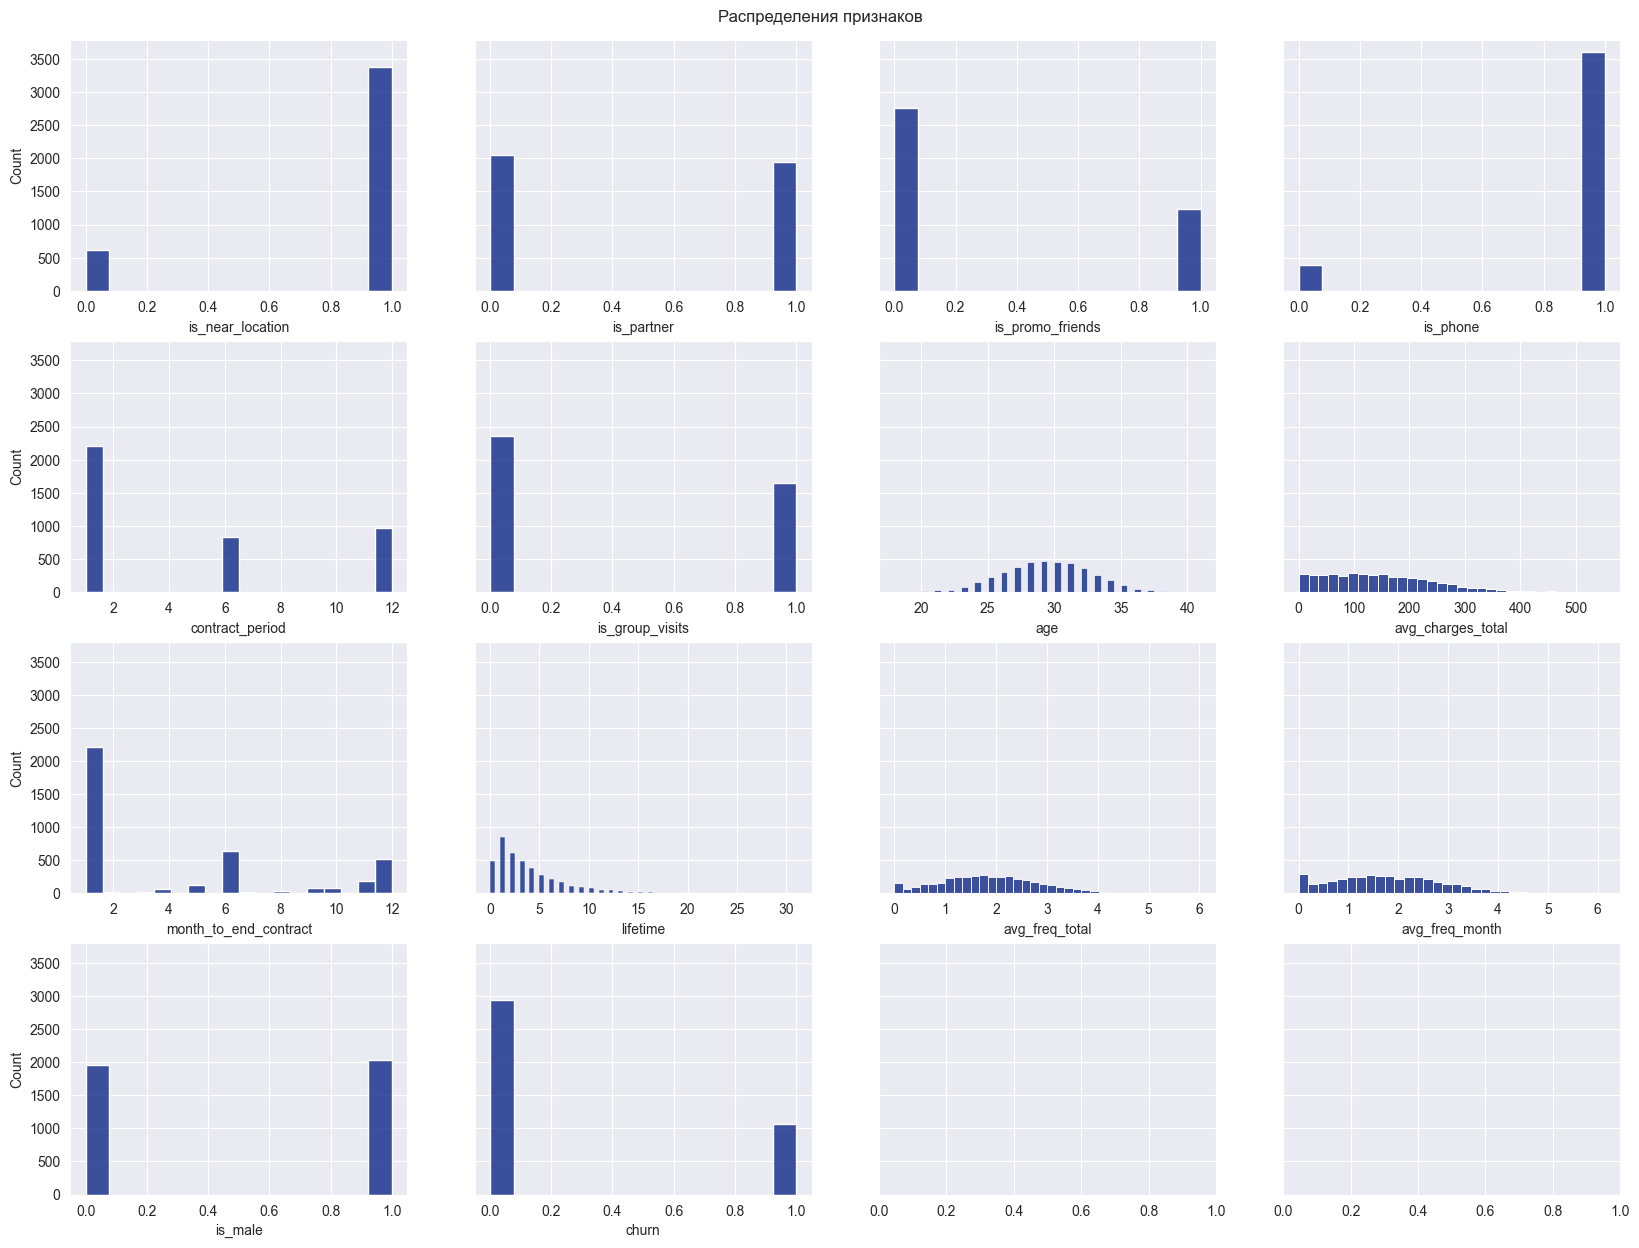

In [13]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15), sharey=True)

for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axs[i//4][i%4])

plt.suptitle('Распределения признаков', y=0.9) 
plt.show()

Подтверждается гипотеза о том, что в бинарных признаках нет аномалий.    
`month_to_end_contract`, `contract_period` могут принимать лишь определенные значения. Разберемся с остальными признаками:

Посмотрим на распределение признаков с целевой переменной:

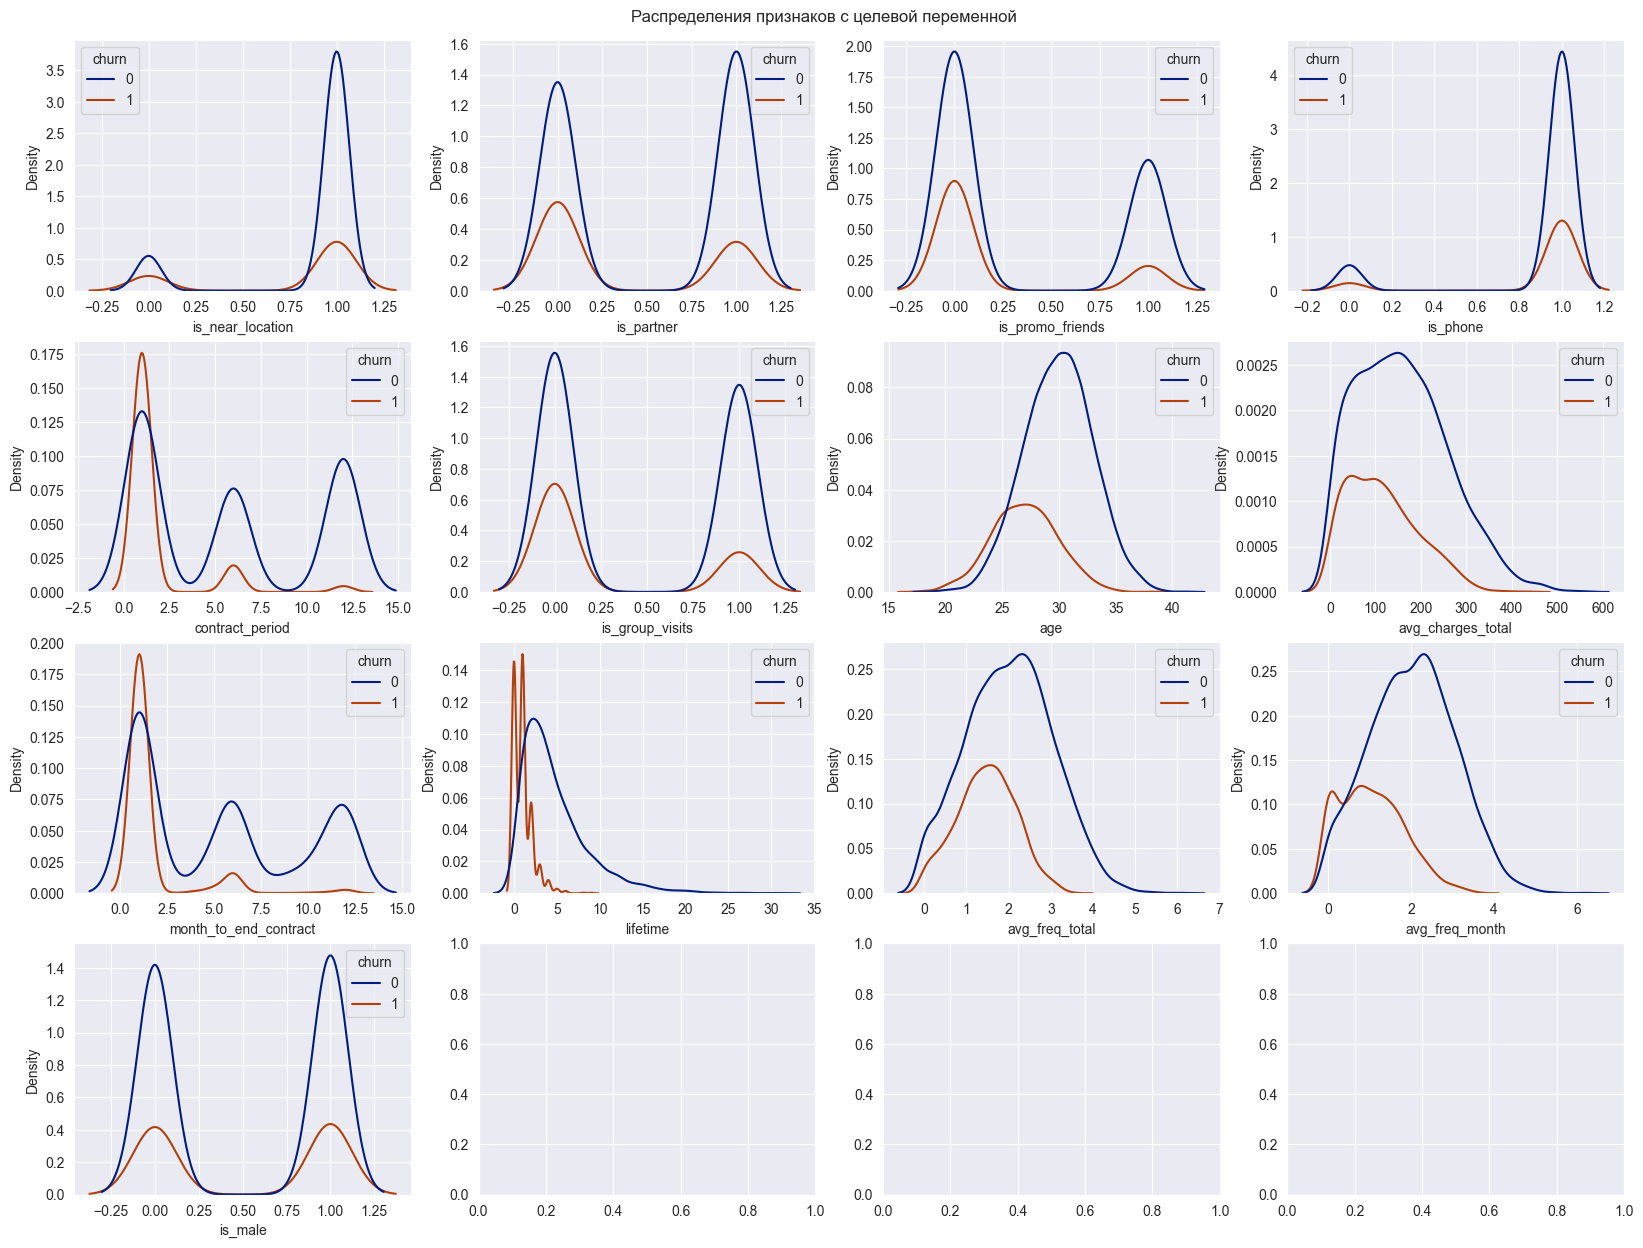

In [14]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15))

for i, col in enumerate(data.select_dtypes(exclude=object).drop(columns=['churn'])):
    sns.kdeplot(data=data, x=col, hue='churn', ax=axs[i//4][i%4])

plt.suptitle('Распределения признаков с целевой переменной', y=0.9) 
plt.show()

Видим, что большинство ушедших клиентов имели длительность действующего абонемента равную 1 месяцу. Также видим, что все клиенты, которые покинули нас, впервые обращались в фитнес-центр не более 9 месяцев назад.

Займемся поиском аномалий в данных:

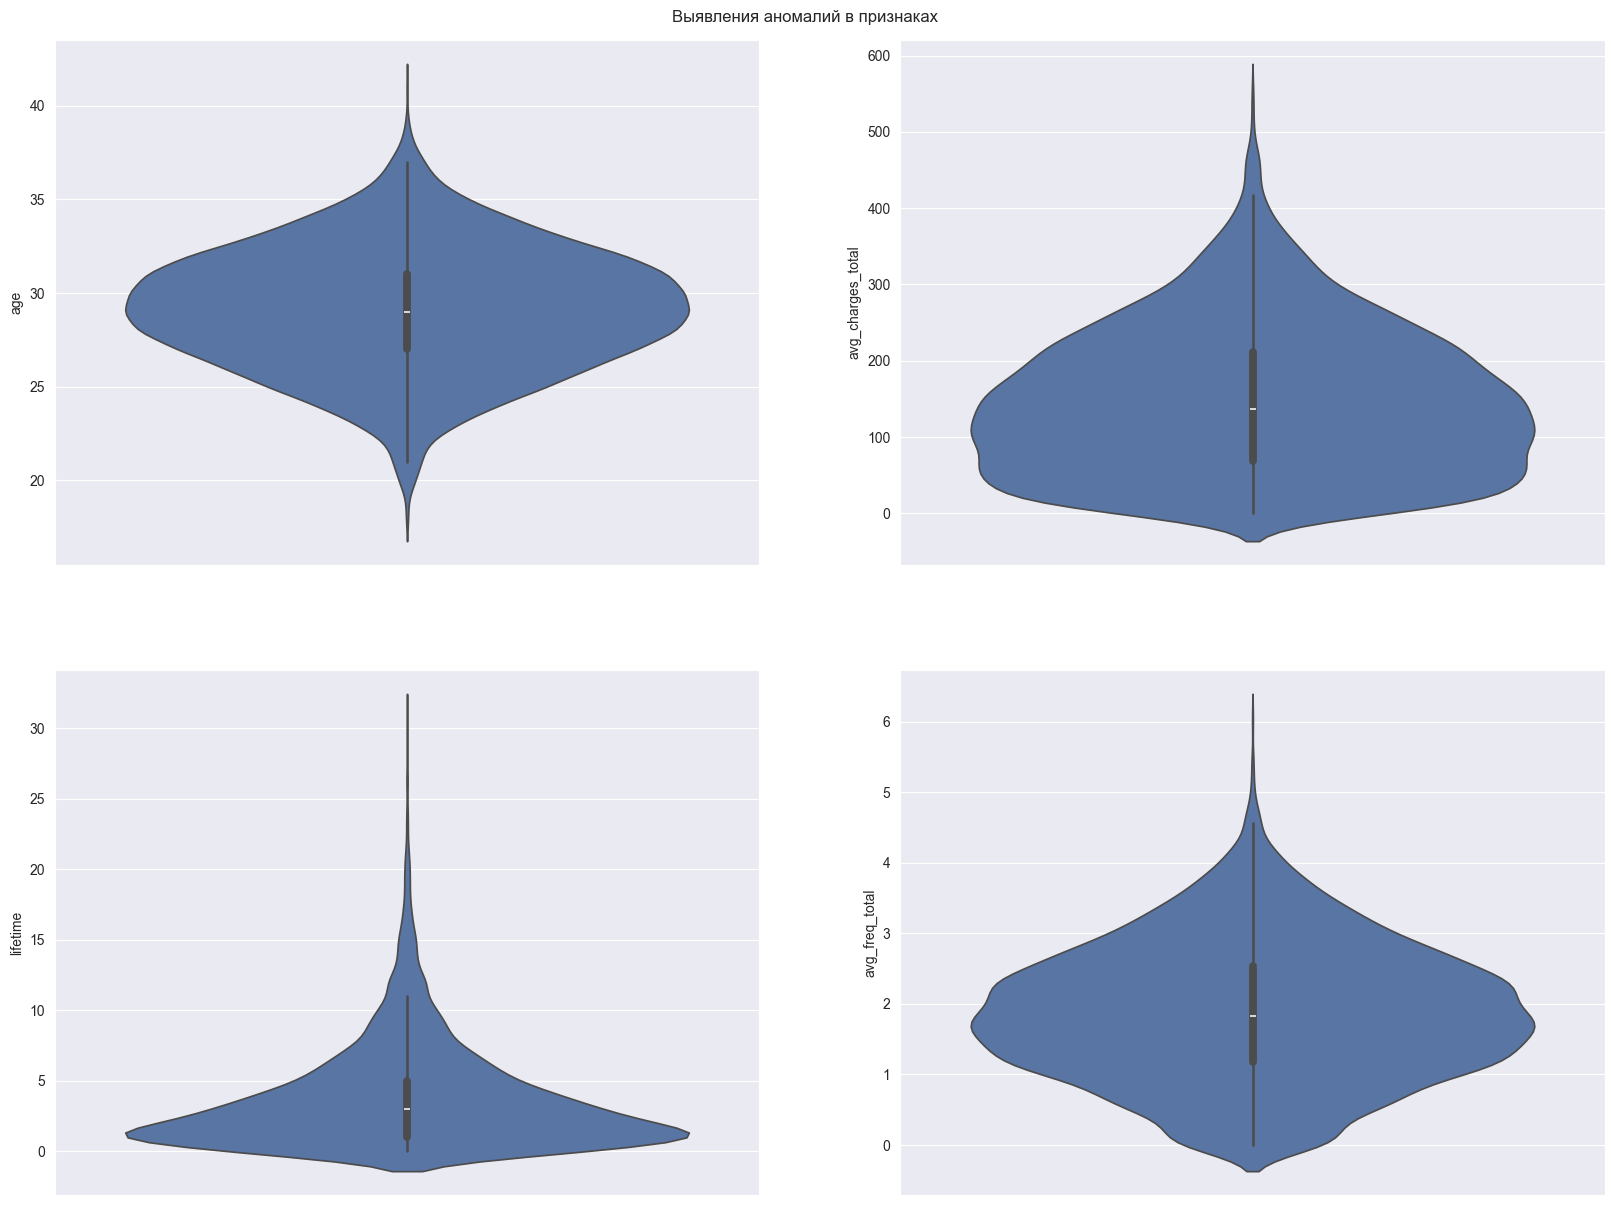

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=True)

for i, col in enumerate(data[['age', 'avg_charges_total', 'lifetime', 'avg_freq_total']].columns):
    sns.violinplot(data[col], ax=axs[i//2][i%2], palette='deep')

plt.suptitle('Выявления аномалий в признаках', y=0.9) 
plt.show()

Видим, что по всем признакам присутствуют аномальные значения. Посмотрим, сколько данных мы потеряем при простом удалении:

In [16]:
df = data[['age', 'avg_charges_total', 'lifetime', 'avg_freq_total']]
print(f'При удалении аномальных значений мы теряем {round((1 - len(df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]) / len(data)) * 100, 2)}% от данных.')

При удалении аномальных значений мы теряем 3.08% от данных.


Можем себе позволить, избавимся от выбросов:

In [17]:
res_ind = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)].index.tolist()
data = data.loc[res_ind, :].reset_index().drop(columns=['index'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   is_near_location       3877 non-null   int64  
 1   is_partner             3877 non-null   int64  
 2   is_promo_friends       3877 non-null   int64  
 3   is_phone               3877 non-null   int64  
 4   contract_period        3877 non-null   int64  
 5   is_group_visits        3877 non-null   int64  
 6   age                    3877 non-null   int64  
 7   avg_charges_total      3877 non-null   float64
 8   month_to_end_contract  3877 non-null   int32  
 9   lifetime               3877 non-null   int64  
 10  avg_freq_total         3877 non-null   float64
 11  avg_freq_month         3877 non-null   float64
 12  is_male                3877 non-null   uint8  
 13  churn                  3877 non-null   int64  
dtypes: float64(3), int32(1), int64(9), uint8(1)
memory usage

Проверим результат на графиках:

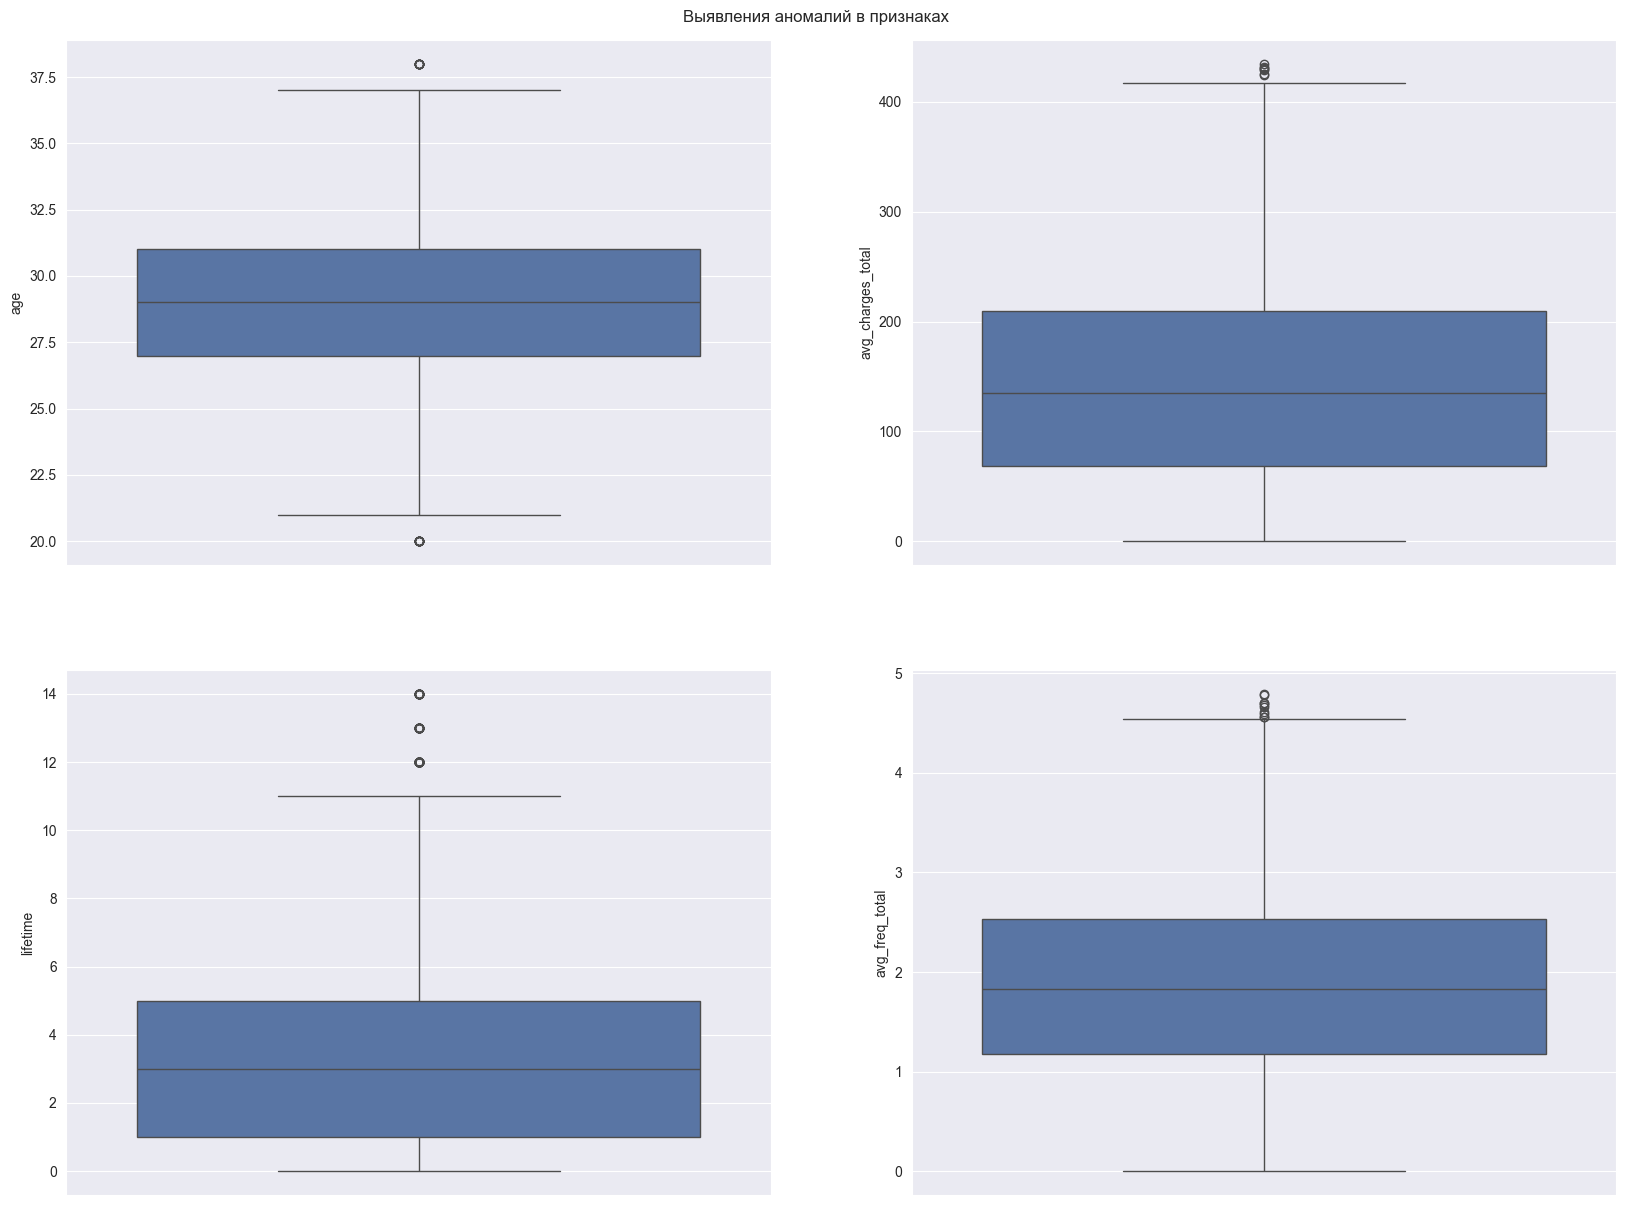

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=True)

for i, col in enumerate(data[['age', 'avg_charges_total', 'lifetime', 'avg_freq_total']].columns):
        sns.boxplot(data[col], ax=axs[i//2][i%2], palette='deep')

plt.suptitle('Выявления аномалий в признаках', y=0.9) 
plt.show()

Построим корреляционную матрицу для выявления значимых признаков:
<a id='corr'></a>

interval columns not set, guessing: ['is_near_location', 'is_partner', 'is_promo_friends', 'is_phone', 'contract_period', 'is_group_visits', 'age', 'avg_charges_total', 'month_to_end_contract', 'lifetime', 'avg_freq_total', 'avg_freq_month', 'is_male', 'churn']


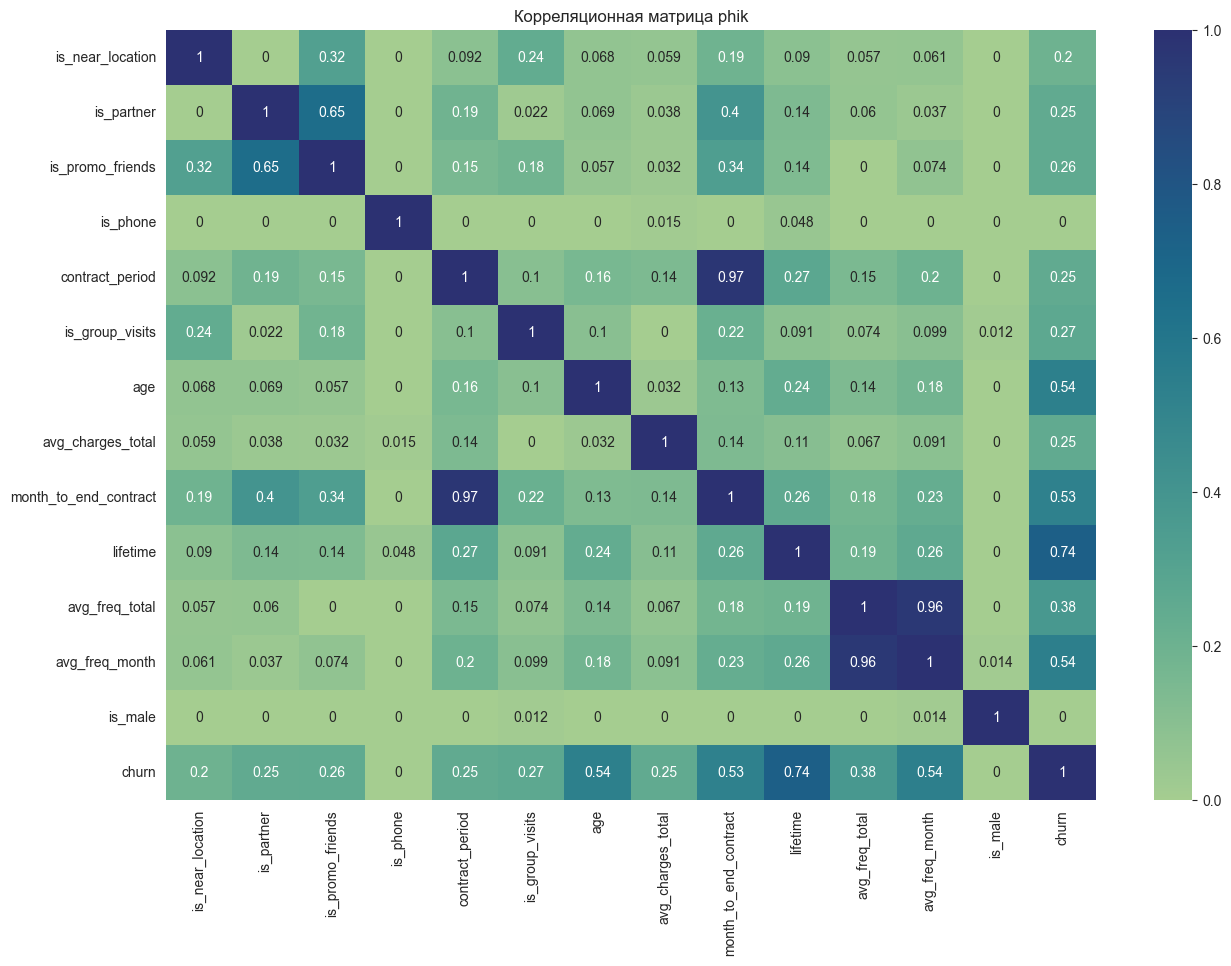

In [19]:
plt.figure(figsize=(15, 10))

sns.heatmap(phik.phik_matrix(data), annot=True, cmap="crest")
plt.title('Корреляционная матрица phik')
plt.show()

Удалим признаки `is_phone`, `is_male` из-за низкой корреляции с целевой переменной. Также удалим `month_to_end_contract`, `avg_freq_total` во избежание мультиколлинеарности.

In [20]:
data = data.drop(columns=['is_phone', 'is_male', 'month_to_end_contract', 'avg_freq_total'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_near_location   3877 non-null   int64  
 1   is_partner         3877 non-null   int64  
 2   is_promo_friends   3877 non-null   int64  
 3   contract_period    3877 non-null   int64  
 4   is_group_visits    3877 non-null   int64  
 5   age                3877 non-null   int64  
 6   avg_charges_total  3877 non-null   float64
 7   lifetime           3877 non-null   int64  
 8   avg_freq_month     3877 non-null   float64
 9   churn              3877 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 303.0 KB


Выведем коэффициенты инфляции дисперсии (VIF), которые измеряют корреляцию и силу корреляции между независимыми переменными:

In [22]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('churn~is_near_location + is_partner+ is_promo_friends+is_group_visits+age+avg_charges_total+contract_period+lifetime+avg_freq_month', data=data, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,87.985293,Intercept
1,1.098522,is_near_location
2,1.362855,is_partner
3,1.359320,is_promo_friends
4,1.060963,is_group_visits
5,1.074535,age
6,1.025303,avg_charges_total
7,1.230146,contract_period
8,1.110427,lifetime
9,1.090223,avg_freq_month


Делаем вывод о том, что в наших признаках отсутствует мультиколлинеарность. Перейдем к построению моделей.

### Прогнозирование оттока пользователей

Выделим признаки и целевую переменную:

In [23]:
X = data.drop(columns=['churn'])
y = data['churn']

Разобьем данные на обучающую и тестовую выборки:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

В наших данных представлены разные единицы измерения, поэтому воспользуемся стандартизацией:

In [25]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

С помощью кривой обучения выберем оптимальную долю тренировочной выборки по разным моделям:

In [26]:
from yellowbrick.model_selection import LearningCurve

**Логистическая регрессия:**

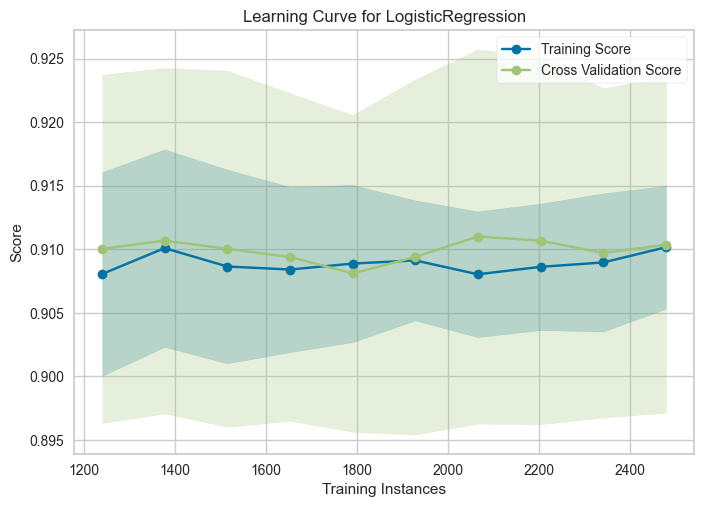

In [27]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1, 10)
).fit(X_train_st, y_train).show() 

**RidgeClassifier:**

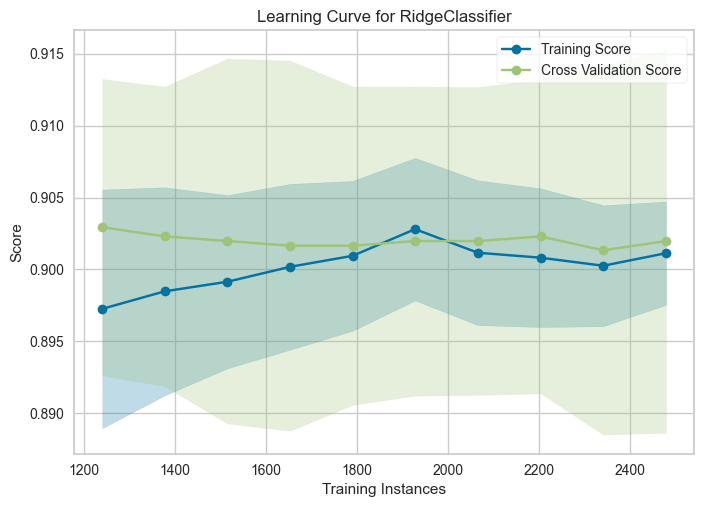

In [28]:
from sklearn.linear_model import RidgeClassifier

visualizer = LearningCurve(
    RidgeClassifier(alpha=200), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X_train_st, y_train) .show()

**RandomForestClassifier:**

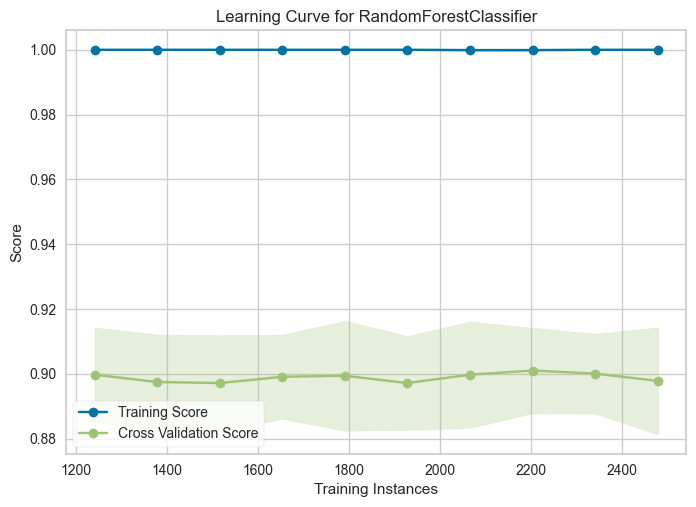

In [29]:
visualizer = LearningCurve(
    RandomForestClassifier(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X_train_st, y_train) .show()

**SVC:**

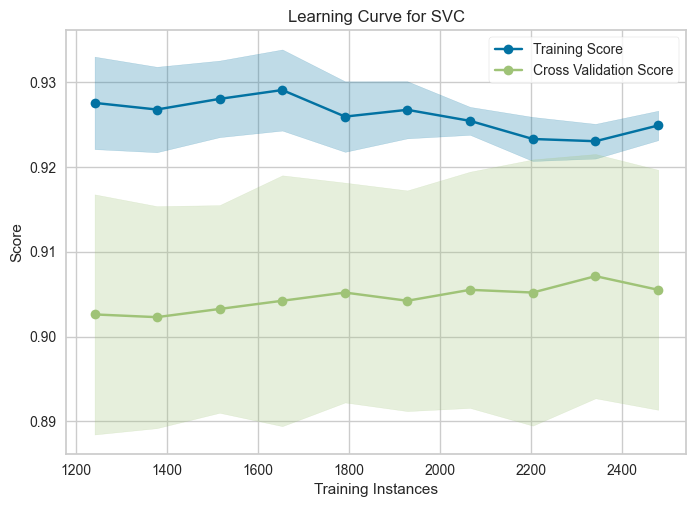

In [30]:
from sklearn import svm

visualizer = LearningCurve(
    svm.SVC(C=2), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X_train_st, y_train) .show()

По кривым обучения разных моделей видим, что лучшую эффективность прогнозируем от алгоритмов: `LogisticRegression`, `RidgeClassifier` и `SVR`. Размер тестовой выборки примем равным 20% от всего объема данных.

Займемся оптимизацией гиперпараметров моделей:

In [31]:
from sklearn.model_selection import GridSearchCV

Напишем функцию, которая принимает на вход модель и сетку параметров. На выходе получим лучшую модель по метрике `recall`. Нам важна именно эта метрика, так как она позволит свести к минимуму ложноотрицательные прогнозы и не упустить клиентов, которые на самом деле могут уйти.

In [32]:
def optimaze_par(model, grid):
    grid_model = GridSearchCV(estimator=model,
                            param_grid=grid,
                            scoring='recall',
                            cv=5,
                            verbose=1)
    grid_model.fit(X_train_st,y_train)

    return grid_model.best_estimator_, f'Recall: {round(recall_score(grid_model.predict(X_test_st), y_test), 3)}'


**Логистическая регрессия:**

In [33]:
optimaze_par(LogisticRegression(), {'penalty':['l1', 'l2', 'elasticnet', None],
              'max_iter':[80, 100, 150]})

Fitting 5 folds for each of 12 candidates, totalling 60 fits


(LogisticRegression(max_iter=80), 'Recall: 0.845')

**RidgeClassifier:**

In [34]:
optimaze_par(RidgeClassifier(), {'alpha':[1, 5, 10, 20, 25, 30, 35, 40, 100],
              'max_iter':[80, 100, 150]})

Fitting 5 folds for each of 27 candidates, totalling 135 fits


(RidgeClassifier(alpha=1, max_iter=80), 'Recall: 0.851')

**RandomForestClassifier:**

In [35]:
optimaze_par(RandomForestClassifier(), {'max_depth':[10, 12, 15],
              'max_leaf_nodes':[300, 500, 800], 'min_samples_split' : [1, 3, 4]})

Fitting 5 folds for each of 27 candidates, totalling 135 fits


(RandomForestClassifier(max_depth=12, max_leaf_nodes=300, min_samples_split=3),
 'Recall: 0.852')

**SVC:**

In [36]:
optimaze_par(svm.SVC(), {'C':[3, 5, 7],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree' : [1, 2]})

Fitting 5 folds for each of 24 candidates, totalling 120 fits


(SVC(C=3, degree=1, kernel='poly'), 'Recall: 0.847')

Для дальнейшей работы выберем модель `RidgeClassifier` из-за высокого значения метрики `recall`.

In [37]:
model = RidgeClassifier(alpha=100, max_iter=80)

Обучим модель:

In [38]:
model.fit(X_train_st, y_train)

RidgeClassifier(alpha=100, max_iter=80)

Построим диагностические кривые для нашей модели. Получим вероятности принадлежности к каждому классу:

In [39]:
d = model.decision_function(X_test_st)
probs = np.exp(d) / np.sum(np.exp(d))

Найдем метрики `FPR` (false positive rate), `TPR` (true positive rate) и значение порога. Фактически, данная функция берет определенное количество значений порога (в промежутке от 0 до 1), применяет данный порог для точной классификации, исходя из переданной ей матрицы вероятностей, и вычисляет при данном значении порога две упомянутые метрики.

In [40]:
fpr, tpr, _ = roc_curve(y_test, probs)

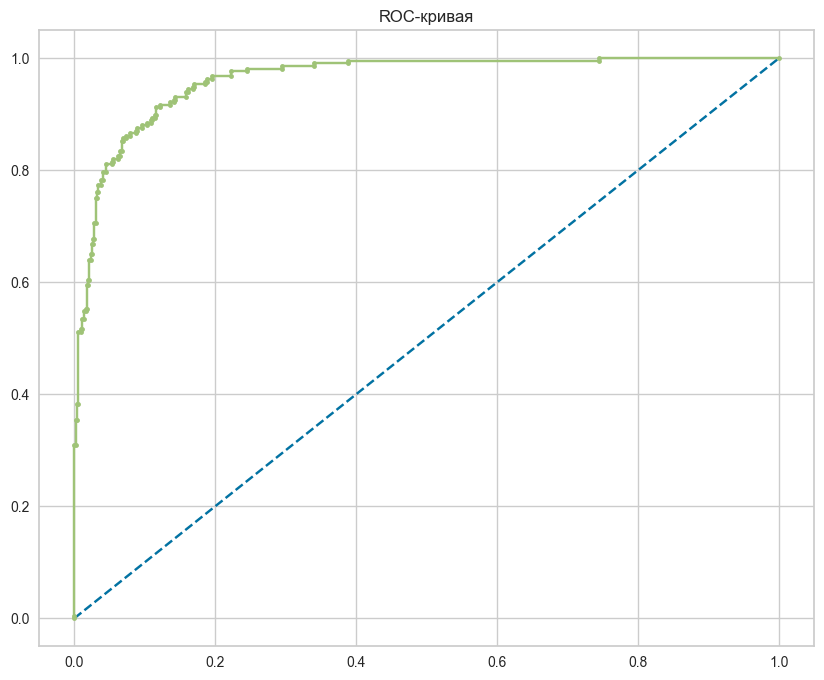

In [41]:
plt.figure(figsize=(10, 8))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-кривая')
plt.show()

Получим метрику ROC-AUC, определющую площадь под графиком кривой:

In [42]:
roc_auc_score(y_test, probs)

0.9627296934123641

Построим график PR-кривой:

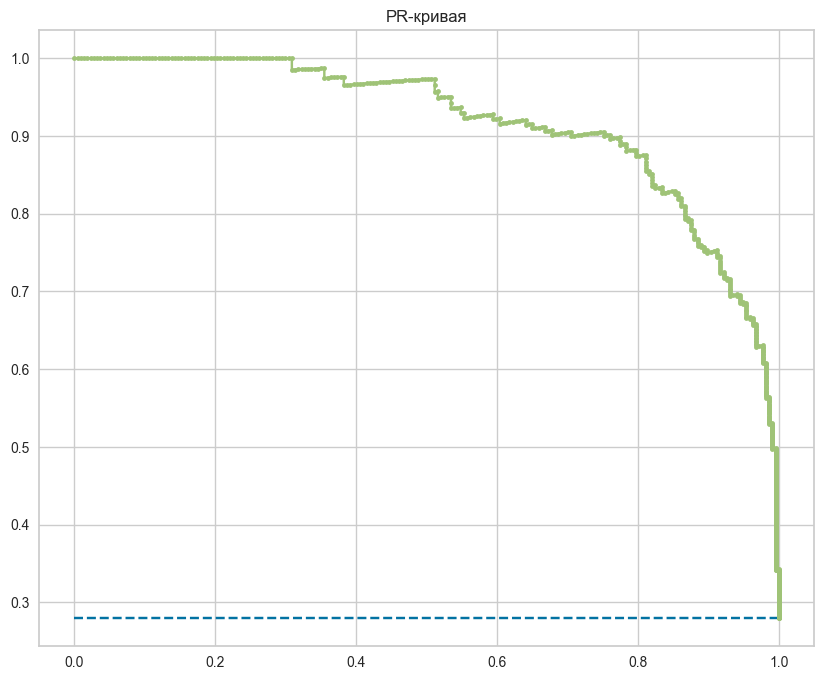

In [43]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, probs)

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.title('PR-кривая')
plt.show()

Площадь под графиком PR-кривой - PR-AUC:

In [44]:
auc(recall, precision)

0.9168181688226869

Построим отчет классификации нашей модели:

In [45]:
y_test_pred = model.predict(X_test_st)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       559
           1       0.86      0.81      0.84       217

    accuracy                           0.91       776
   macro avg       0.90      0.88      0.89       776
weighted avg       0.91      0.91      0.91       776



Метрика `recall` для положительного класса заметно ниже, чем для отрицательного. Попробуем оптимизировать модель, подобрав оптимальное значение порога. По PR-кривой мы видим, что при разных значениях порога иногда метрика `precision` будет больше, иногда - `recall`. Именно поэтому мы будем оптимизировать по метрике `F1`. Для этого импортируем из бибилиотеки numpy функцию `argmax`:

In [46]:
from numpy import argmax

f1 = (2 * precision * recall) / (precision + recall)
ix = argmax(f1)
pr_thresholds[ix]

0.0017209771208865133

Так как индексы всех массивов, возвращенных функцией `precision_recall_curve` соответственны, по этому индексу получим значение порога и соответствующее ему значение метрики `f1`:

In [47]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.001721, F-Score=0.842


Добавим найденную точку на графике PR-кривой:

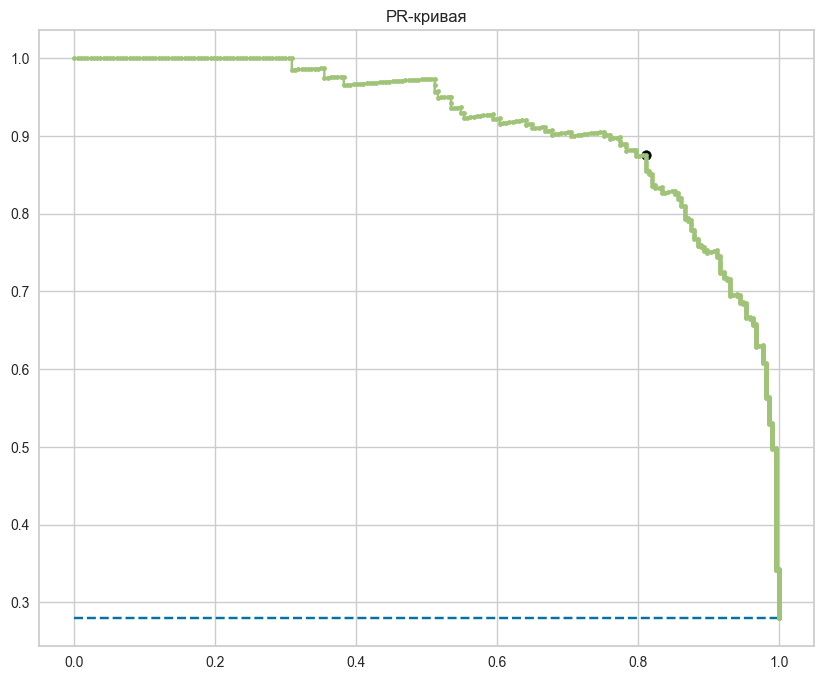

In [48]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.scatter(recall[ix], precision[ix], marker='o', color='black')
plt.title('PR-кривая')
plt.show()

Получим прогнозы, используя новое пороговое значение:

In [49]:
y_pred = (probs > pr_thresholds[ix]).astype('int')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       559
           1       0.88      0.81      0.84       217

    accuracy                           0.91       776
   macro avg       0.90      0.88      0.89       776
weighted avg       0.91      0.91      0.91       776



Видим, что не получилось значительно улучшить метрику `recall` для первого класса. Есть оптимизировать порог под метрику исключительно под метрику `recall`, но этот ход заметно снизит прочие показатели эффективности.

Попробуем применить модель `LogisticRegression(max_iter=80)`:

In [50]:
model = LogisticRegression(max_iter=80)
model.fit(X_train_st, y_train)

LogisticRegression(max_iter=80)

Получим отчет классификации:

In [51]:
y_test_pred = model.predict(X_test_st)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       559
           1       0.85      0.83      0.84       217

    accuracy                           0.91       776
   macro avg       0.89      0.89      0.89       776
weighted avg       0.91      0.91      0.91       776



Эта модель лучше подходит для нашей бизнес-задачи, так как мы с большим успехом определяем клиентов, которые действительно уходят.

Выведем коэффициенты нашей итоговой модели:

In [52]:
data_coef = pd.DataFrame(index=['Intercept']+X.columns.tolist(), data=model.intercept_.tolist() + model.coef_[0].tolist())
data_coef.columns = ['coef']

In [53]:
data_coef

,coef
Intercept,-3.540618
is_near_location,-0.100127
is_partner,-0.125565
is_promo_friends,-0.223232
contract_period,-1.358362
is_group_visits,-0.387663
age,-1.103720
avg_charges_total,-0.512097
lifetime,-3.156823
avg_freq_month,-1.249699


### Кластеризация клиентов

Перед нами стоит задача выделить сегменты ЦА, которые склонны покидать наш фитнес-центр.

Первым делом, нарисуем дендограмму, чтобы предположить примерное количество кластеров, но сначала стандартизируем данные:

In [54]:
sc = StandardScaler()
X_st = sc.fit_transform(X)

In [55]:
linked = linkage(X_st, method = 'ward') 

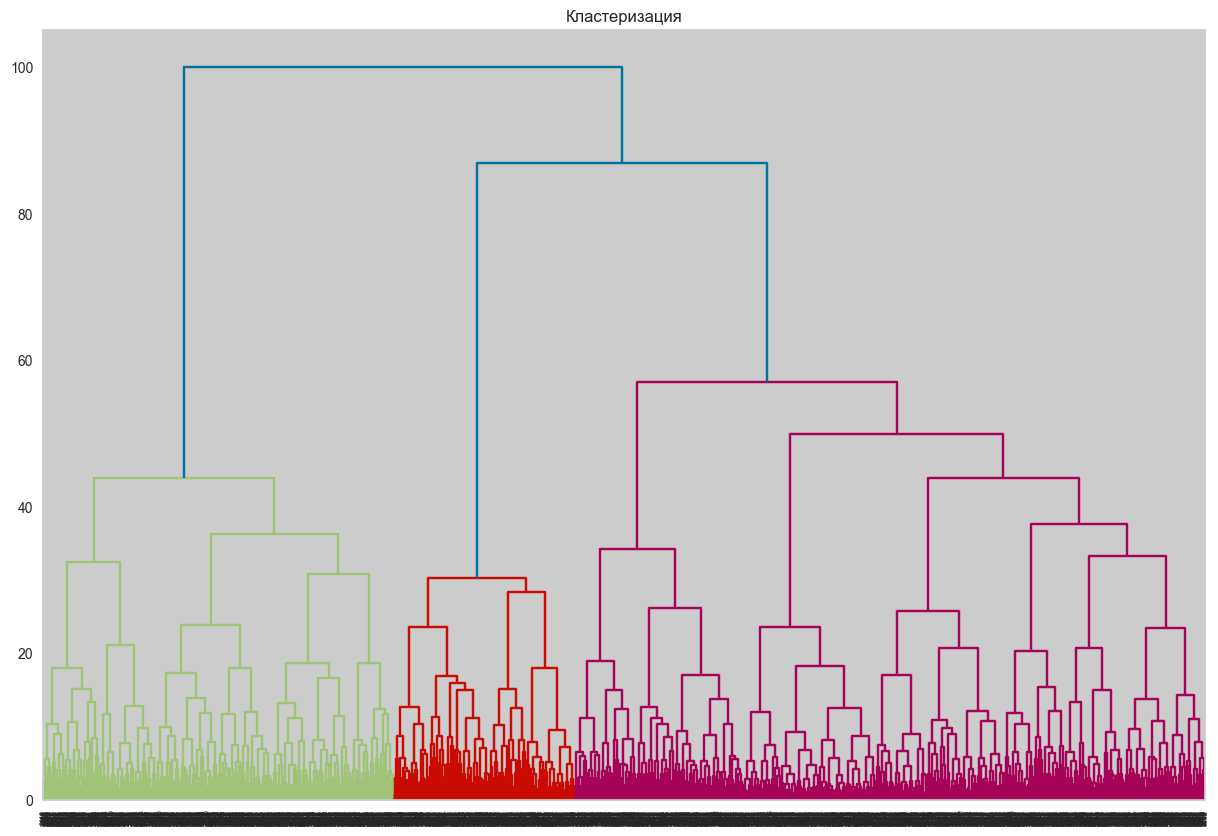

In [56]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация')
plt.show() 

На основе дендограммы можно выделить 3-4 кластера. Введем метод ближайших соседей и добавим принадлежность к классу в наши данные:

In [57]:
km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(X_st)

Добавим в наш датасет выделенные кластеры:

In [58]:
data['cluster'] = labels

Посмотрим на средние значения признаков по кластерам и выведем графики. Это поможет нам выделить особенности склонных к оттоку клиентов:

In [59]:
cols = data.columns.tolist()[:-1]

In [60]:
pivot = pd.pivot_table(data=data, columns='cluster', values=cols, aggfunc='mean').T.reset_index()

In [61]:
pivot

,cluster,age,avg_charges_total,avg_freq_month,churn,contract_period,is_group_visits,is_near_location,is_partner,is_promo_friends,lifetime
0,0,27.641659,115.701363,1.160054,0.595763,2.017652,0.290380,1.000000,0.227714,0.080318,1.654898
1,1,28.678930,134.612741,1.597116,0.409699,2.969900,0.224080,0.000000,0.491639,0.076923,2.819398
2,2,29.686145,153.883907,1.917109,0.111216,6.954760,0.528746,0.996230,0.883129,1.000000,4.075401
3,3,30.537327,172.483592,2.313086,0.018433,6.133641,0.515207,0.998157,0.377880,0.003687,4.901382


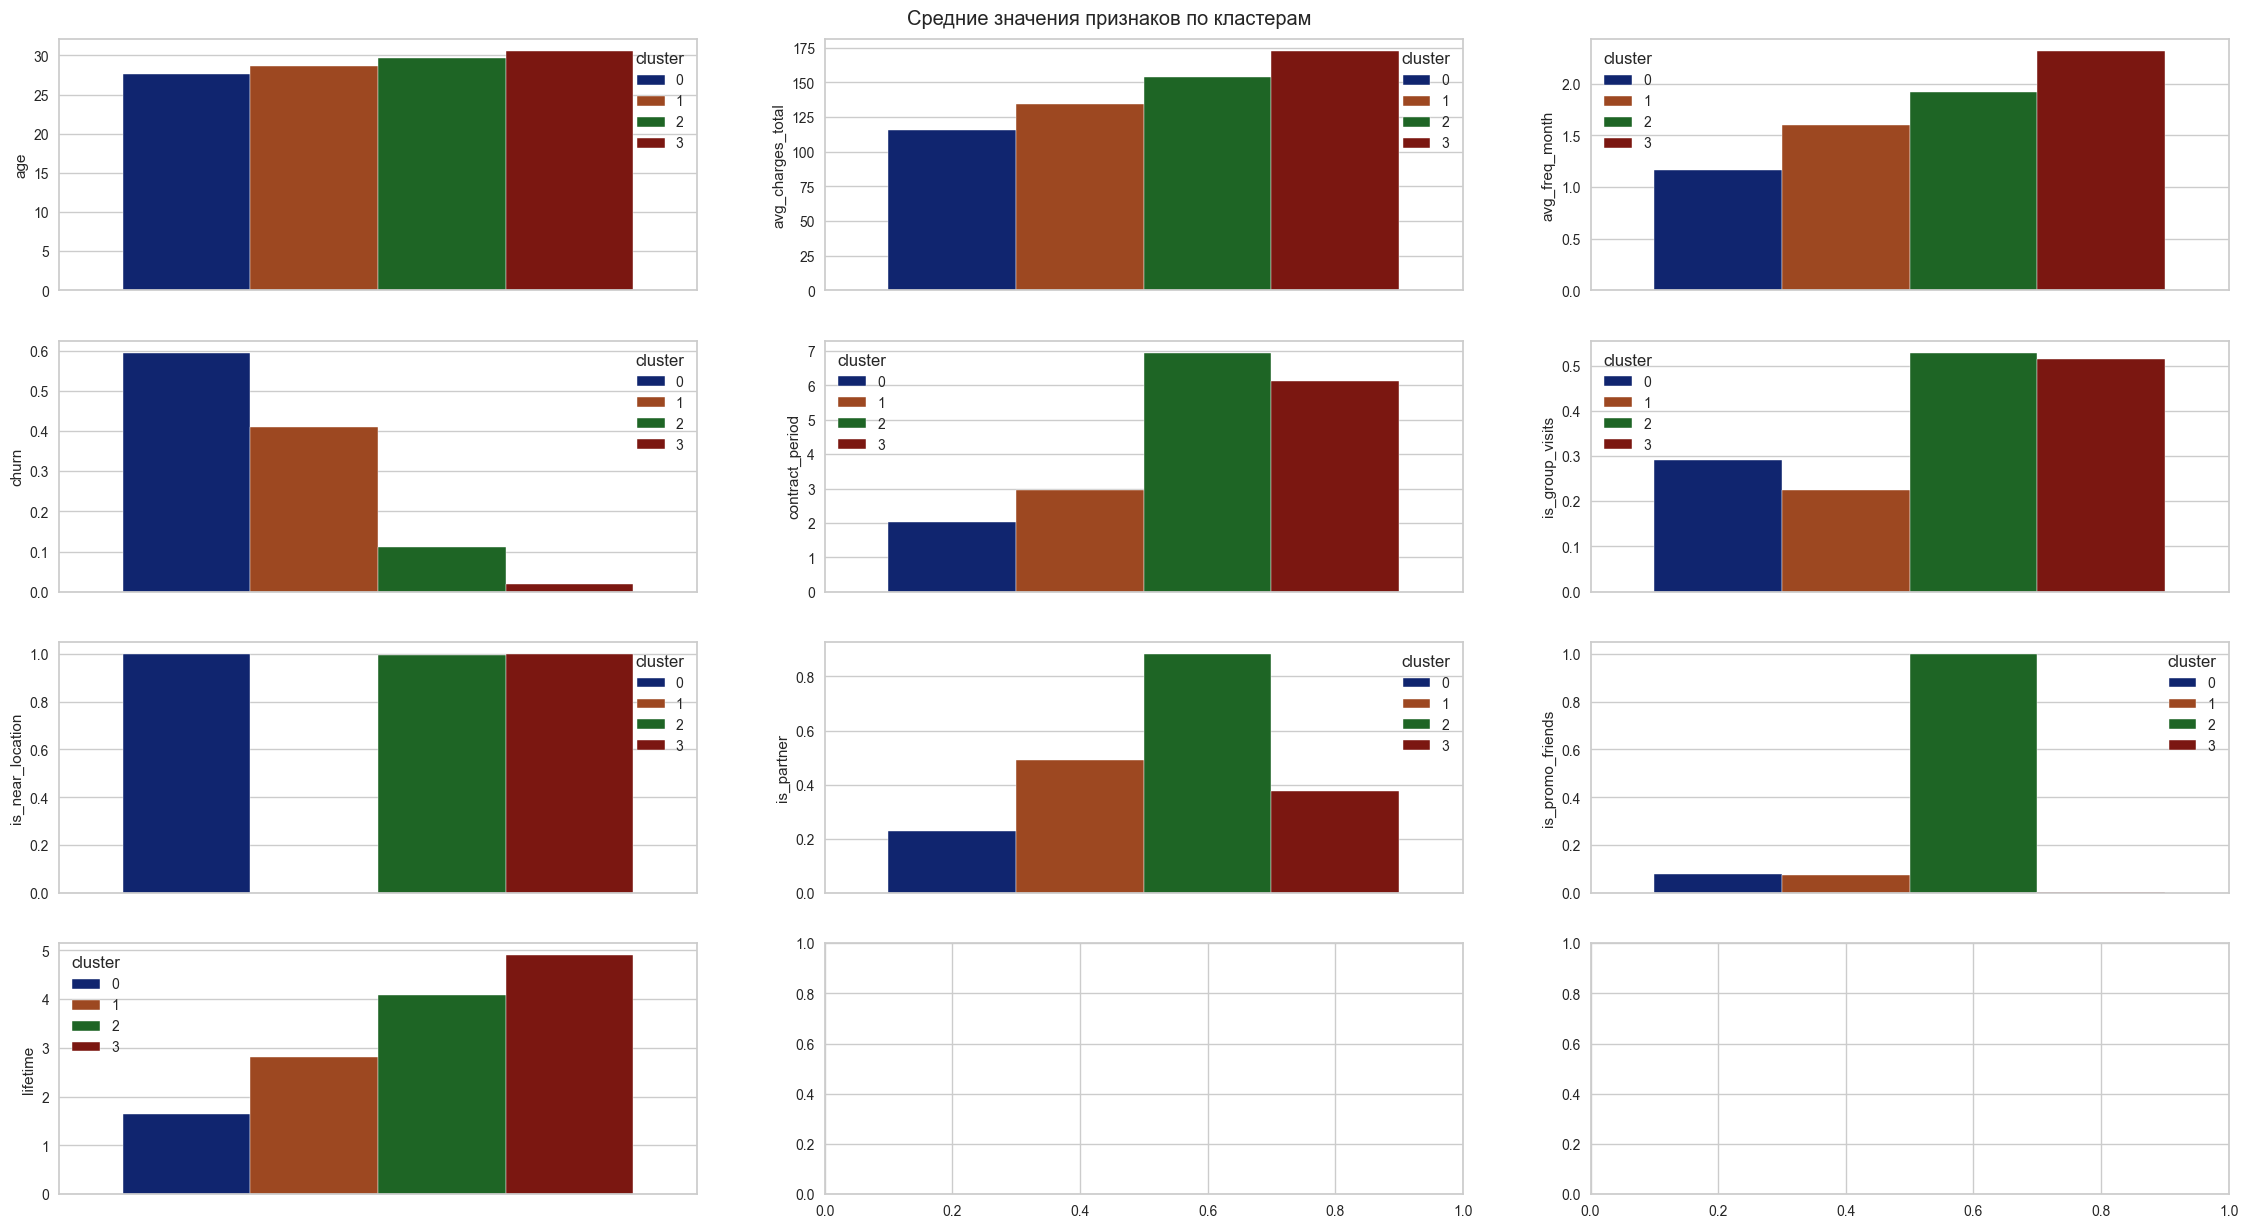

In [66]:
fig, axs = plt.subplots(4, 3, figsize=(28, 15))

for i, col in enumerate(pivot.columns[1:]):
    sns.barplot(data=pivot, y=col, hue='cluster', ax=axs[i//3][i%3], palette='dark')

plt.suptitle('Средние значения признаков по кластерам', y=0.9) 
plt.show()

Глядя на диаграммы, можем сформировать портрет клиента, **склонного к уходу** из нашего фитнес-центра:

1) Сравнительно низкая посещаемость зала за прошлый месяц. В основном 1 раз в неделю;    
2) Действие текущего абонемента 1 месяц или 3 месяца;    
3) Живет не в районе расположения фитнес-центра;   
4) Сравнительно небольшие траты на дополнительные услуги фитнес-центра. В среднем 120 д.е.;    
5) Впервые обратился в наш фитнес-центр около 1-2 месяцев назад.     
    
Что **удерживает** наших клиентов:   
1) Вовлеченность в групповые занятия;    
2) Проживание в районе расположения фитнес-центра;    
3) Работа в компании-партнере фитнес-центра.   

Отметим, что у фитнес-центра есть "Верный" сегмент ЦА. Эти клиенты впервые обратились в зал раньше прочих и за это время время так и не покинули нас! Посмотрим на количество представителей каждого сегмента:

In [63]:
data['cluster'].value_counts().sort_index()

0    1133
1     598
2    1061
3    1085
Name: cluster, dtype: int64

Кластеры достаточно многочисленны, поэтому остановимся на такой сегментации ЦА.

### Выводы

Перед нами стояла задача выявить факторы, влияющие на отток клиентов из нашего фитнес-центра, и построить модель, прогнозирующую отток клиента на следующий месяц. <br>

Прежде всего, **мы изучили общую информацию и провели предобработку данных**. На этом этапе мы описали наш датасет, проверили данные на пропуски и дубликаты. Далее мы перешли к **исследовательскому анализу.** Здесь мы посмотрели на **распределения** признаков и целевой переменной, выявили **аномалии** в данных и избавились от них. Важным шагом было выделение значимых признаков для последующего построения модели. Мы решили эту задачу, используя **корреляционную матрицу.** Наконец, мы занялись **построением моделей.** **Стандартизировав** данные, мы посмотрели на **кривые обучения** по разным моделям, оптимизировали их **гиперпараметры** и оценили **диагностические кривые.** В качестве итоговой модели была выбрана `LogisticRegression`, ее ключевая метрика `recall` составила $0,89$ по двум классам и $0,84$ для класса $1$ (ушедшие клиенты).

Завершая работу, мы **сегментировали** ЦА нашего фитнес-центра, что помогло выделить примечательные признаки клиентов, склонных покидать нас.

### Рекомендации

Анализ показал, что к нам **лояльны** клиенты, которые вовлечены в **посещение групповых занятий**. Тогда необходимо продвигать формат групповых занятий для наших клиентов, предлагая выгодные условия и большое разнообразие форматов.
- Вовлечение клиентов в групповые занятия

Нас редко покидают клиенты со **сроком** действия текущего **абонемента** 6 и более месяцев. Имеет место, предлагать клиентам выгодные условия для покупки долгосрочных абонементов. 
- Выгодные предложения на долгосрочные абонементы

Клиенты, которые пришли в наш фитнес-центр в рамках **партнерской программы** или акции **"Приведи друга"**, не задумываются о том, чтобы покидать нас. Можно масштабировать подобные акции, привлекая новых клиентов.
- Маркетинговые инициативы

Данные рекомендации могут помочь фитнес-центру скорректировать текущий формат работы с клиентами и в результате снизить `churn rate`.